In [1]:
import sys; sys.path.append('..')
import prosodic2 as p
from prosodic2 import *
from tqdm import tqdm
import pandas as pd

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=25

In [3]:
txt="""
Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date;
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance or nature's changing course untrimm'd;
But thy eternal summer shall not fade,
Nor lose possession of that fair thou ow'st;
Nor shall death brag thou wander'st in his shade,
When in eternal lines to time thou grow'st:
   So long as men can breathe or eyes can see,
   So long lives this, and this gives life to thee.

"""

In [4]:
# txt="Into the woods we go"

## Loading text

In [5]:
txtdf = parse_phon(txt)
txtdf

Tokenizing and syllabifying [x1]: 100%|██████████| 14/14 [00:00<00:00, 16.88it/s]


is_peak  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa            
0        0      0      Shall    0          'ʃæl     0      Shall    'ʃæl            1   
                1      I        0          'aɪ      0      I        'aɪ             1   
                2      compare  0          kəm.'pɛr 0      com      kəm             1   
                                                    1      pare     'pɛr            1   
                3      thee     0          ðiː      0      thee     ðiː             1   
...                                                                               ...   
         13     7      gives    0          'gɪvz    0      gives    'gɪvz           0   
                8      life     0          'laɪf    0      life     'laɪf           0   
                9      to       0          tuː      0      to       tuː             0   
                10     thee     0          ðiː      0      thee     ðiː             0   
                11     .        0                   0      .                        0   

                                                                              prom_stress  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        0      0      Shall    0          'ʃæl     0      Shall    'ʃæl              1.0   
                1      I        0          'aɪ      0      I        'aɪ               1.0   
                2      compare  0          kəm.'pɛr 0      com      kəm               0.0   
                                                    1      pare     'pɛr              1.0   
                3      thee     0          ðiː      0      thee     ðiː               0.0   
...                                                                                   ...   
         13     7      gives    0          'gɪvz    0      gives    'gɪvz             1.0   
                8      life     0          'laɪf    0      life     'laɪf             1.0   
                9      to       0          tuː      0      to       tuː               0.0   
                10     thee     0          ðiː      0      thee     ðiː               0.0   
                11     .        0                   0      .                          NaN   

                                                                              is_trough  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa              
0        0      0      Shall    0          'ʃæl     0      Shall    'ʃæl              0   
                1      I        0          'aɪ      0      I        'aɪ               0   
                2      compare  0          kəm.'pɛr 0      com      kəm               0   
                                                    1      pare     'pɛr              0   
                3      thee     0          ðiː      0      thee     ðiː               0   
...                                                                                 ...   
         13     7      gives    0          'gɪvz    0      gives    'gɪvz             0   
                8      life     0          'laɪf    0      life     'laɪf             0   
                9      to       0          tuː      0      to       tuː               0   
                10     thee     0          ðiː      0      thee     ðiː               0   
                11     .        0                   0      .                          0   

                                                                              is_stressed  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        0      0      Shall    0          'ʃæl     0      Shall    'ʃæl                1   
                1      I        0          'aɪ      0      I        'aɪ                 1   
                2      compare  0          kəm.'pɛr 0      com      kəm                 0   
                                                    1      pa

In [6]:
def iter_lines(txtdf):
    for stanza_i,stanzadf in txtdf.groupby('stanza_i'):
        lines=tqdm(list(stanzadf.groupby('line_i')),desc='Scanning through lines')
        for line_,linedf in lines:
            yield linedf

In [7]:
for line_df in iter_lines(txtdf): pass
line_df

Scanning through lines: 100%|██████████| 14/14 [00:00<00:00, 305834.67it/s]


is_peak  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa            
0        13     0      So       0          'soʊ     0      So       'soʊ            0   
                1      long     0          'lɔːŋ    0      long     'lɔːŋ           0   
                2      lives    0          'lɪvz    0      lives    'lɪvz           0   
                3      this     0          ðɪs      0      this     ðɪs             0   
                4      ,        0                   0      ,                        0   
                5      and      0          ænd      0      and      ænd             0   
                6      this     0          ðɪs      0      this     ðɪs             0   
                7      gives    0          'gɪvz    0      gives    'gɪvz           0   
                8      life     0          'laɪf    0      life     'laɪf           0   
                9      to       0          tuː      0      to       tuː             0   
                10     thee     0          ðiː      0      thee     ðiː             0   
                11     .        0                   0      .                        0   

                                                                              prom_stress  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        13     0      So       0          'soʊ     0      So       'soʊ              1.0   
                1      long     0          'lɔːŋ    0      long     'lɔːŋ             1.0   
                2      lives    0          'lɪvz    0      lives    'lɪvz             1.0   
                3      this     0          ðɪs      0      this     ðɪs               0.0   
                4      ,        0                   0      ,                          NaN   
                5      and      0          ænd      0      and      ænd               0.0   
                6      this     0          ðɪs      0      this     ðɪs               0.0   
                7      gives    0          'gɪvz    0      gives    'gɪvz             1.0   
                8      life     0          'laɪf    0      life     'laɪf             1.0   
                9      to       0          tuː      0      to       tuː               0.0   
                10     thee     0          ðiː      0      thee     ðiː               0.0   
                11     .        0                   0      .                          NaN   

                                                                              is_trough  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa              
0        13     0      So       0          'soʊ     0      So       'soʊ              0   
                1      long     0          'lɔːŋ    0      long     'lɔːŋ             0   
                2      lives    0          'lɪvz    0      lives    'lɪvz             0   
                3      this     0          ðɪs      0      this     ðɪs               0   
                4      ,        0                   0      ,                          0   
                5      and      0          ænd      0      and      ænd               0   
                6      this     0          ðɪs      0      this     ðɪs               0   
                7      gives    0          'gɪvz    0      gives    'gɪvz             0   
                8      life     0          'laɪf    0      life     'laɪf             0   
                9      to       0          tuː      0      to       tuː               0   
                10     thee     0          ðiː      0      thee     ðiː               0   
                11     .        0                   0      .                          0   

                                                                              is_stressed  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        13     0      So       0          'soʊ     0      So      

## Looping windows

In [8]:
def iter_windows(df,window_len=3):
    for linedf in iter_lines(df):
        ldf=linedf.reset_index()
        linedf_nopunc = ldf[ldf.word_ipa!=""]
        linewords=[g for n,g in linedf_nopunc.groupby('word_i')]
        for wordslice in slices(linewords,window_len,strict=True):
            dfslice=pd.concat(wordslice)
            yield setindex(dfslice)

In [9]:
for dfw in iter_windows(line_df): break #display(dfw)
dfw

Scanning through lines:   0%|          | 0/1 [00:00<?, ?it/s]


is_peak  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa            
0        13     0      So       0          'soʊ     0      So       'soʊ            0   
                1      long     0          'lɔːŋ    0      long     'lɔːŋ           0   
                2      lives    0          'lɪvz    0      lives    'lɪvz           0   

                                                                              prom_stress  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        13     0      So       0          'soʊ     0      So       'soʊ              1.0   
                1      long     0          'lɔːŋ    0      long     'lɔːŋ             1.0   
                2      lives    0          'lɪvz    0      lives    'lɪvz             1.0   

                                                                              is_trough  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa              
0        13     0      So       0          'soʊ     0      So       'soʊ              0   
                1      long     0          'lɔːŋ    0      long     'lɔːŋ             0   
                2      lives    0          'lɪvz    0      lives    'lɪvz             0   

                                                                              is_stressed  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        13     0      So       0          'soʊ     0      So       'soʊ                1   
                1      long     0          'lɔːŋ    0      long     'lɔːŋ               1   
                2      lives    0          'lɪvz    0      lives    'lɪvz               1   

                                                                              is_unstressed  \
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                  
0        13     0      So       0          'soʊ     0      So       'soʊ                  0   
                1      long     0          'lɔːŋ    0      long     'lɔːŋ                 0   
                2      lives    0          'lɪvz    0      lives    'lɪvz                 0   

                                                                              prom_strength  
stanza_i line_i word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                 
0        13     0      So       0          'soʊ     0      So       'soʊ                NaN  
                1      long     0          'lɔːŋ    0      long     'lɔːŋ               NaN  
                2      lives    0          'lɪvz    0      lives    'lɪvz               NaN

## Combos

In [10]:
def iter_combos(df):
    # get all combos in window/line
    for lci,dfcombo in enumerate(apply_combos(df,'word_i','word_ipa_i')):
        dfcombo['combo_i']=lci
        dfcombo['combo_ii']=list(range(len(dfcombo)))
        yield setindex(dfcombo)

In [11]:
for dfc in iter_combos(dfw): pass
dfc

is_peak  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa            
0        13     0       0        0      So       0          'soʊ     0      So       'soʊ            0   
                        1        1      long     0          'lɔːŋ    0      long     'lɔːŋ           0   
                        2        2      lives    0          'lɪvz    0      lives    'lɪvz           0   

                                                                                               is_trough  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa              
0        13     0       0        0      So       0          'soʊ     0      So       'soʊ              0   
                        1        1      long     0          'lɔːŋ    0      long     'lɔːŋ             0   
                        2        2      lives    0          'lɪvz    0      lives    'lɪvz             0   

                                                                                               is_stressed  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        13     0       0        0      So       0          'soʊ     0      So       'soʊ                1   
                        1        1      long     0          'lɔːŋ    0      long     'lɔːŋ               1   
                        2        2      lives    0          'lɪvz    0      lives    'lɪvz               1   

                                                                                               is_unstressed  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                  
0        13     0       0        0      So       0          'soʊ     0      So       'soʊ                  0   
                        1        1      long     0          'lɔːŋ    0      long     'lɔːŋ                 0   
                        2        2      lives    0          'lɪvz    0      lives    'lɪvz                 0   

                                                                                               prom_stress  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        13     0       0        0      So       0          'soʊ     0      So       'soʊ              1.0   
                        1        1      long     0          'lɔːŋ    0      long     'lɔːŋ             1.0   
                        2        2      lives    0          'lɪvz    0      lives    'lɪvz             1.0   

                                                                                               prom_strength  
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                 
0        13     0       0        0      So       0          'soʊ     0      So       'soʊ                NaN  
                        1        1      long     0          'lɔːŋ    0      long     'lɔːŋ               NaN  
                        2        2      lives    0          'lɪvz    0      lives    'lɪvz               NaN

In [12]:
def iter_all_combos(df):
    for dfw in iter_windows(df):
        for dfc in iter_combos(dfw):
            yield dfc

In [13]:
for dfc in iter_all_combos(txtdf): pass
dfc

Scanning through lines: 100%|██████████| 14/14 [00:02<00:00,  4.71it/s]


is_peak  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa            
0        13     0       0        8      life     0          'laɪf    0      life     'laɪf           0   
                        1        9      to       0          tuː      0      to       tuː             0   
                        2        10     thee     0          ðiː      0      thee     ðiː             0   

                                                                                               is_trough  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa              
0        13     0       0        8      life     0          'laɪf    0      life     'laɪf             0   
                        1        9      to       0          tuː      0      to       tuː               0   
                        2        10     thee     0          ðiː      0      thee     ðiː               0   

                                                                                               is_stressed  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        13     0       0        8      life     0          'laɪf    0      life     'laɪf               1   
                        1        9      to       0          tuː      0      to       tuː                 0   
                        2        10     thee     0          ðiː      0      thee     ðiː                 0   

                                                                                               is_unstressed  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                  
0        13     0       0        8      life     0          'laɪf    0      life     'laɪf                 0   
                        1        9      to       0          tuː      0      to       tuː                   1   
                        2        10     thee     0          ðiː      0      thee     ðiː                   1   

                                                                                               prom_stress  \
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                
0        13     0       0        8      life     0          'laɪf    0      life     'laɪf             1.0   
                        1        9      to       0          tuː      0      to       tuː               0.0   
                        2        10     thee     0          ðiː      0      thee     ðiː               0.0   

                                                                                               prom_strength  
stanza_i line_i combo_i combo_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa                 
0        13     0       0        8      life     0          'laɪf    0      life     'laɪf               NaN  
                        1        9      to       0          tuː      0      to       tuː                 NaN  
                        2        10     thee     0          ðiː      0      thee     ðiː                 NaN

In [14]:
dfcall=pd.concat(iter_all_combos(txtdf)).reset_index()
dfcall=dfcall[dfcall.line_i<2]
dfcall=setindex(dfcall)
dfcall

Scanning through lines: 100%|██████████| 14/14 [00:02<00:00,  4.68it/s]


is_peak  \
stanza_i line_i combo_i combo_ii word_i word_str  word_ipa_i word_ipa    syll_i syll_str syll_ipa            
0        0      0       0        0      Shall     0          'ʃæl        0      Shall    'ʃæl            1   
                                 1      I         0          'aɪ         0      I        'aɪ             1   
                                 2      compare   0          kəm.'pɛr    0      com      kəm             1   
                                 3      thee      0          ðiː         0      thee     ðiː             1   
                                 4      to        0          tuː         0      to       tuː             0   
...                                                                                                    ...   
         1      3       2        3      lovely    0          'lʌv.liː    0      love     'lʌv            0   
                                 6      temperate 1          'tɛm.pɛː.ət 0      tem      'tɛm            1   
                        3        3      lovely    0          'lʌv.liː    1      ly       liː             0   
                                 6      temperate 1          'tɛm.pɛː.ət 1      per      pɛː             1   
                        4        6      temperate 1          'tɛm.pɛː.ət 2      ate      ət              0   

                                                                                                   is_unstressed  \
stanza_i line_i combo_i combo_ii word_i word_str  word_ipa_i word_ipa    syll_i syll_str syll_ipa                  
0        0      0       0        0      Shall     0          'ʃæl        0      Shall    'ʃæl                  0   
                                 1      I         0          'aɪ         0      I        'aɪ                   0   
                                 2      compare   0          kəm.'pɛr    0      com      kəm                   1   
                                 3      thee      0          ðiː         0      thee     ðiː                   1   
                                 4      to        0          tuː         0      to       tuː                   1   
...                                                                                                          ...   
         1      3       2        3      lovely    0          'lʌv.liː    0      love     'lʌv                  0   
                                 6      temperate 1          'tɛm.pɛː.ət 0      tem      'tɛm                  0   
                        3        3      lovely    0          'lʌv.liː    1      ly       liː                   1   
                                 6      temperate 1          'tɛm.pɛː.ət 1      per      pɛː                   1   
                        4        6      temperate 1          'tɛm.pɛː.ət 2      ate      ət                    1   

                                                                                                   prom_stress  \
stanza_i line_i combo_i combo_ii word_i word_str  word_ipa_i word_ipa    syll_i syll_str syll_ipa                
0        0      0       0        0      Shall     0          'ʃæl        0      Shall    'ʃæl              1.0   
                                 1      I         0          'aɪ         0      I        'aɪ               1.0   
                                 2      compare   0          kəm.'pɛr    0      com      kəm               0.0   
                                 3      thee      0          ðiː         0      thee     ðiː               0.0   
                                 4      to        0          tuː         0      to       tuː               0.0   
...                                                                                                        ...   
         1      3       2        3      lovely    0          'lʌv.liː    0      love     'lʌv              1.0   
                                 6      temperate 1          'tɛm.pɛː.ət 0      tem      'tɛm              1.0   
                   

## Parses

In [15]:
def iter_poss_parses(df):
    for posi,posl in enumerate(possible_parses(len(df))):
        df['parse_i']=posi
        df['parse_ii']=list(range(len(posl)))
        df['parse']=''.join(posl)
        df['syll_parse']=list(posl)
        df['is_w']=[np.int(x=='w') for x in posl]
        df['is_s']=[np.int(x=='s') for x in posl]
        yield setindex(df)

In [16]:
for dfp in iter_poss_parses(dfc): pass
dfp

is_peak  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse            
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                 0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                 0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                 0   

                                                                                                                                 is_w  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse         
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s              0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s              0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w              1   

                                                                                                                                 is_trough  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse              
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                   0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                   0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                   0   

                                                                                                                                 is_stressed  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse                
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                     1   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                     0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                     0   

                                                                                                                                 is_unstressed  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse                  
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                       0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                       1   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                       1   

                                                                                                                                 is_s  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse         
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s              1   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s              1   
                        2      

In [17]:
def parse_group(df,constraints=DEFAULT_CONSTRAINTS):
    dfpc=apply_constraints(df)
    lkeys=[c for c in df.columns if c not in set(dfpc.columns)]
    return df[lkeys].join(dfpc)

In [18]:
parse_group(dfp)

is_peak  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse            
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                 0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                 0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                 0   

                                                                                                                                 is_w  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse         
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s              0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s              0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w              1   

                                                                                                                                 is_trough  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse              
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                   0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                   0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                   0   

                                                                                                                                 is_stressed  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse                
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                     1   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                     0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                     0   

                                                                                                                                 is_unstressed  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse                  
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                       0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                       1   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                       1   

                                                                                                                                 is_s  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse         
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s              1   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s              1   
                        2      

In [19]:
def iter_parsed(df):
    for pi,dfp in enumerate(iter_poss_parses(df)):
        dfpc=parse_group(dfp)
        yield dfpc

In [20]:
for dfpc in iter_parsed(dfp): pass
dfpc

is_peak  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse            
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                 0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                 0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                 0   

                                                                                                                                 is_w  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse         
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s              0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s              0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w              1   

                                                                                                                                 is_trough  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse              
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                   0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                   0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                   0   

                                                                                                                                 is_stressed  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse                
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                     1   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                     0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                     0   

                                                                                                                                 is_unstressed  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse                  
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                       0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                       1   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                       1   

                                                                                                                                 is_s  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse         
0        13     0       0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s              1   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s              1   
                        2      

In [21]:
def iter_all_parsed(df):
    for dfc in iter_all_combos(txtdf):
        yield from iter_parsed(dfc)

In [22]:
# for dfpc in iter_all_parsed(dfc): pass
# dfpc

## Parallel?

In [23]:
def get_parsed(df):
#     print('--> get_parsed',df)
    gen=iter_parsed(df)
    return list(gen)

In [24]:
# get_parsed(dfc)

In [25]:
def get_all_parsed(txtdf):
    # get all combos
    objs=list(iter_all_combos(txtdf))
    # map
    res=pmap(
        get_parsed,
        objs,
        num_proc=7
    )
    # return df
    resdf=pd.concat([x for y in res for x in y])
    return resdf

In [26]:
df_all_parsed = get_all_parsed(txtdf)
df_all_parsed

Mapping get_parsed() [x7]: 100%|██████████| 133/133 [00:01<00:00, 67.16it/s]


is_peak  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse            
0        0      0       0        0       wsws  0        0      Shall    0          'ʃæl     0      Shall    'ʃæl     w                 1   
                        1        0       wsws  1        1      I        0          'aɪ      0      I        'aɪ      s                 1   
                        2        0       wsws  2        2      compare  0          kəm.'pɛr 0      com      kəm      w                 1   
                        3        0       wsws  3        2      compare  0          kəm.'pɛr 1      pare     'pɛr     s                 1   
                        0        1       swsw  0        0      Shall    0          'ʃæl     0      Shall    'ʃæl     s                 1   
...                                                                                                                                  ...   
         13     0       1        4       wsw   1        9      to       0          tuː      0      to       tuː      s                 0   
                        2        4       wsw   2        10     thee     0          ðiː      0      thee     ðiː      w                 0   
                        0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s                 0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s                 0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w                 0   

                                                                                                                                 is_w  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse         
0        0      0       0        0       wsws  0        0      Shall    0          'ʃæl     0      Shall    'ʃæl     w              1   
                        1        0       wsws  1        1      I        0          'aɪ      0      I        'aɪ      s              0   
                        2        0       wsws  2        2      compare  0          kəm.'pɛr 0      com      kəm      w              1   
                        3        0       wsws  3        2      compare  0          kəm.'pɛr 1      pare     'pɛr     s              0   
                        0        1       swsw  0        0      Shall    0          'ʃæl     0      Shall    'ʃæl     s              0   
...                                                                                                                               ...   
         13     0       1        4       wsw   1        9      to       0          tuː      0      to       tuː      s              0   
                        2        4       wsw   2        10     thee     0          ðiː      0      thee     ðiː      w              1   
                        0        5       ssw   0        8      life     0          'laɪf    0      life     'laɪf    s              0   
                        1        5       ssw   1        9      to       0          tuː      0      to       tuː      s              0   
                        2        5       ssw   2        10     thee     0          ðiː      0      thee     ðiː      w              1   

                                                                                                                                 is_trough  \
stanza_i line_i combo_i combo_ii parse_i parse parse_ii word_i word_str word_ipa_i word_ipa syll_i syll_str syll_ipa syll_parse              
0        0      0       0        0       wsws  0        0      Shall    0          'ʃæl     0      Shall    'ʃæl     w                   0   
                        1        0       wsws  1        1      I        0          'aɪ      0      I

## Reconstructing lines

In [38]:
dfap = df_all_parsed.reset_index()
dfap

,stanza_i,line_i,combo_i,combo_ii,parse_i,parse,parse_ii,word_i,word_str,word_ipa_i,word_ipa,syll_i,syll_str,syll_ipa,syll_parse,is_peak,is_w,is_trough,is_stressed,is_unstressed,is_s,prom_stress,prom_strength,*w/stressed,*s/unstressed,*w/peak,*total
0,0,0,0,0,0,wsws,0,0,Shall,0,'ʃæl,0,Shall,'ʃæl,w,1,1,0,1,0,0,1.0,1.0,1,0,1,2
1,0,0,0,1,0,wsws,1,1,I,0,'aɪ,0,I,'aɪ,s,1,0,0,1,0,1,1.0,1.0,0,0,0,0
2,0,0,0,2,0,wsws,2,2,compare,0,kəm.'pɛr,0,com,kəm,w,1,1,0,0,1,0,0.0,1.0,0,0,1,1
3,0,0,0,3,0,wsws,3,2,compare,0,kəm.'pɛr,1,pare,'pɛr,s,1,0,0,1,0,1,1.0,1.0,0,0,0,0
4,0,0,0,0,1,swsw,0,0,Shall,0,'ʃæl,0,Shall,'ʃæl,s,1,0,0,1,0,1,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0,13,0,1,4,wsw,1,9,to,0,tuː,0,to,tuː,s,0,0,0,0,1,1,0.0,NaN,0,1,0,1
2054,0,13,0,2,4,wsw,2,10,thee,0,ðiː,0,thee,ðiː,w,0,1,0,0,1,0,0.0,NaN,0,0,0,0
2055,0,13,0,0,5,ssw,0,8,life,0,'laɪf,0,life,'laɪf,s,0,0,0,1,0,1,1.0,NaN,0,0,0,0
2056,0,13,0,1,5,ssw,1,9,to,0,tuː,0,to,tuː,s,0,0,0,0,1,1,0.0,NaN,0,1,0,1


In [94]:
qcols=['stanza_i','line_i','word_i','word_ipa_i','syll_i','syll_parse','combo_ii','parse']

In [95]:
dfap.set_index(qcols).head(25).xs(0,level='word_i')

combo_i  parse_i  \
stanza_i line_i word_ipa_i syll_i syll_parse combo_ii parse                     
0        0      0          0      w          0        wsws         0        0   
                                  s          0        swsw         0        1   
                                  w          0        wwss         0        2   
                                  s          0        swws         0        3   
                                  w          0        wssw         0        4   
                                  s          0        ssww         0        5   

                                                             parse_ii  \
stanza_i line_i word_ipa_i syll_i syll_parse combo_ii parse             
0        0      0          0      w          0        wsws          0   
                                  s          0        swsw          0   
                                  w          0        wwss          0   
                                  s          0        swws          0   
                                  w          0        wssw          0   
                                  s          0        ssww          0   

                                                            word_str word_ipa  \
stanza_i line_i word_ipa_i syll_i syll_parse combo_ii parse                     
0        0      0          0      w          0        wsws     Shall     'ʃæl   
                                  s          0        swsw     Shall     'ʃæl   
                                  w          0        wwss     Shall     'ʃæl   
                                  s          0        swws     Shall     'ʃæl   
                                  w          0        wssw     Shall     'ʃæl   
                                  s          0        ssww     Shall     'ʃæl   

                                                            syll_str syll_ipa  \
stanza_i line_i word_ipa_i syll_i syll_parse combo_ii parse                     
0        0      0          0      w          0        wsws     Shall     'ʃæl   
                                  s          0        swsw     Shall     'ʃæl   
                                  w          0        wwss     Shall     'ʃæl   
                                  s          0        swws     Shall     'ʃæl   
                                  w          0        wssw     Shall     'ʃæl   
                                  s          0        ssww     Shall     'ʃæl   

                                                             is_peak  is_w  \
stanza_i line_i word_ipa_i syll_i syll_parse combo_ii parse                  
0        0      0          0      w          0        wsws         1     1   
                                  s          0        swsw         1     0   
                                  w          0        wwss         1     1   
                                  s          0        swws         1     0   
                                  w          0        wssw         1     1   
                                  s          0        ssww         1     0   

                                                             is_trough  \
stanza_i line_i word_ipa_i syll_i syll_parse combo_ii parse              
0        0      0          0      w          0        wsws           0   
                                  s          0        swsw           0   
                                  w          0        wwss           0   
                                  s          0        swws           0   
                                  w          0        wssw           0   
                                  s          0        ssww           0   

                                                             is_stressed  \
stanza_i line_i word_ipa_i syll_i syll_parse combo_ii parse                
0        0      0          0      w          0        wsws             1   
                                  s          0        swsw             1   
       

In [96]:
figdf=dfap.groupby(qcols).mean().reset_index()
figdf=figdf[figdf.line_i==0]
figdf

,stanza_i,line_i,word_i,word_ipa_i,syll_i,syll_parse,combo_ii,parse,combo_i,parse_i,parse_ii,is_peak,is_w,is_trough,is_stressed,is_unstressed,is_s,prom_stress,prom_strength,*w/stressed,*s/unstressed,*w/peak,*total
0,0,0,0,0,0,s,0,ssww,0.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,s,0,swsw,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,s,0,swws,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,w,0,wssw,0.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0
4,0,0,0,0,0,w,0,wsws,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,0,7,0,0,s,3,wsws,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
134,0,0,7,0,0,s,3,wwss,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
135,0,0,7,0,0,w,3,ssww,0.0,5.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0
136,0,0,7,0,0,w,3,swsw,0.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0


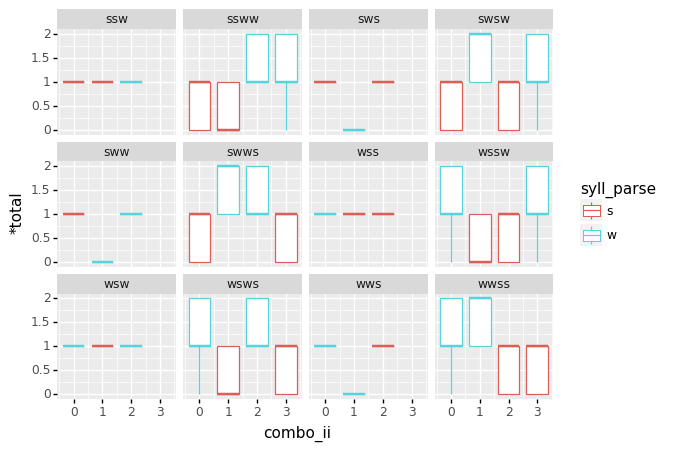

<ggplot: (8753092778349)>

In [98]:
import plotnine as p9
p9.ggplot(
    p9.aes(x='combo_ii',y='*total',color='syll_parse'),
    data=figdf
) + p9.geom_boxplot(p9.aes(group='combo_ii',color='syll_parse')) + p9.facet_wrap('parse')

In [ ]:
dfap.index(qcols)